In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import ensemble, tree, linear_model
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format


https://notebook.community/mwee/BeerRecommender/Recommender

In [3]:
df = pd.read_csv('beer_reviews.csv')
df.head(5).transpose()

,0,1,2,3,4
index,0,1,2,3,4
brewery_id,10325,10325,10325,10325,1075
brewery_name,Vecchio Birraio,Vecchio Birraio,Vecchio Birraio,Vecchio Birraio,Caldera Brewing Company
review_time,1234817823,1235915097,1235916604,1234725145,1293735206
review_overall,1.50,3.00,3.00,3.00,4.00
review_aroma,2.00,2.50,2.50,3.00,4.50
review_appearance,2.50,3.00,3.00,3.50,4.00
review_profilename,stcules,stcules,stcules,stcules,johnmichaelsen
beer_style,Hefeweizen,English Strong Ale,Foreign / Export Stout,German Pilsener,American Double / Imperial IPA
review_palate,1.50,3.00,3.00,2.50,4.00


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1586614.00,793306.50,458016.15,0.00,396653.25,793306.50,1189959.75,1586613.00
brewery_id,1586614.00,3130.10,5578.10,1.00,143.00,429.00,2372.00,28003.00
review_time,1586614.00,1224089280.01,76544274.54,840672001.00,1173224188.25,1239202881.50,1288568405.25,1326285348.00
review_overall,1586614.00,3.82,0.72,0.00,3.50,4.00,4.50,5.00
review_aroma,1586614.00,3.74,0.70,1.00,3.50,4.00,4.00,5.00
review_appearance,1586614.00,3.84,0.62,0.00,3.50,4.00,4.00,5.00
review_palate,1586614.00,3.74,0.68,1.00,3.50,4.00,4.00,5.00
review_taste,1586614.00,3.79,0.73,1.00,3.50,4.00,4.50,5.00
beer_abv,1518829.00,7.04,2.32,0.01,5.20,6.50,8.50,57.70
beer_beerid,1586614.00,21712.79,21818.34,3.00,1717.00,13906.00,39441.00,77317.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [6]:
df.describe()

,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1518829.00,1586614.00
mean,793306.50,3130.10,1224089280.01,3.82,3.74,3.84,3.74,3.79,7.04,21712.79
std,458016.15,5578.10,76544274.54,0.72,0.70,0.62,0.68,0.73,2.32,21818.34
min,0.00,1.00,840672001.00,0.00,1.00,0.00,1.00,1.00,0.01,3.00
25%,396653.25,143.00,1173224188.25,3.50,3.50,3.50,3.50,3.50,5.20,1717.00
50%,793306.50,429.00,1239202881.50,4.00,4.00,4.00,4.00,4.00,6.50,13906.00
75%,1189959.75,2372.00,1288568405.25,4.50,4.00,4.00,4.00,4.50,8.50,39441.00
max,1586613.00,28003.00,1326285348.00,5.00,5.00,5.00,5.00,5.00,57.70,77317.00


In [7]:
df.shape

(1586614, 14)

In [8]:
df.beer_style.unique()

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

In [9]:
df[["beer_style1", "beer_style2"]] = df["beer_style"].str.split("/", expand=True)

In [10]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1586604,1586605,1586606,1586607,1586608,1586609,1586610,1586611,1586612,1586613
index,0,1,2,3,4,5,6,7,8,9,...,1586604,1586605,1586606,1586607,1586608,1586609,1586610,1586611,1586612,1586613
brewery_id,10325,10325,10325,10325,1075,1075,1075,1075,1075,1075,...,14359,14359,14359,14359,14359,14359,14359,14359,14359,14359
brewery_name,Vecchio Birraio,Vecchio Birraio,Vecchio Birraio,Vecchio Birraio,Caldera Brewing Company,Caldera Brewing Company,Caldera Brewing Company,Caldera Brewing Company,Caldera Brewing Company,Caldera Brewing Company,...,The Defiant Brewing Company,The Defiant Brewing Company,The Defiant Brewing Company,The Defiant Brewing Company,The Defiant Brewing Company,The Defiant Brewing Company,The Defiant Brewing Company,The Defiant Brewing Company,The Defiant Brewing Company,The Defiant Brewing Company
review_time,1234817823,1235915097,1235916604,1234725145,1293735206,1325524659,1318991115,1306276018,1290454503,1285632924,...,1288890206,1163291143,1162871808,1162865640,1162685856,1162684892,1161048566,1160702513,1160023044,1160005319
review_overall,1.50,3.00,3.00,3.00,4.00,3.00,3.50,3.00,4.00,4.50,...,4.00,5.00,5.00,5.00,3.50,5.00,4.00,4.50,4.00,5.00
review_aroma,2.00,2.50,2.50,3.00,4.50,3.50,3.50,2.50,3.00,3.50,...,4.50,5.00,4.50,5.00,4.00,4.00,5.00,3.50,4.50,4.50
review_appearance,2.50,3.00,3.00,3.50,4.00,3.50,3.50,3.50,3.50,5.00,...,4.50,5.00,4.00,4.50,4.00,3.50,2.50,3.00,4.50,4.50
review_profilename,stcules,stcules,stcules,stcules,johnmichaelsen,oline73,Reidrover,alpinebryant,LordAdmNelson,augustgarage,...,njmoons,NyackNicky,blitheringidiot,PopeDX,treehugger02010,maddogruss,yelterdow,TongoRad,dherling,cbl2
beer_style,Hefeweizen,English Strong Ale,Foreign / Export Stout,German Pilsener,American Double / Imperial IPA,Herbed / Spiced Beer,Herbed / Spiced Beer,Herbed / Spiced Beer,Herbed / Spiced Beer,Herbed / Spiced Beer,...,Pumpkin Ale,Pumpkin Ale,Pumpkin Ale,Pumpkin Ale,Pumpkin Ale,Pumpkin Ale,Pumpkin Ale,Pumpkin Ale,Pumpkin Ale,Pumpkin Ale
review_palate,1.50,3.00,3.00,2.50,4.00,3.00,4.00,2.00,3.50,4.00,...,3.50,5.00,5.00,5.00,3.50,4.00,2.00,3.50,4.50,4.50


In [11]:
df.drop(['index', 'review_time','brewery_name', 'beer_style'], axis='columns', inplace=True)

In [12]:
numeric = df.select_dtypes(include=[np.number])
numeric.columns

Index(['brewery_id', 'review_overall', 'review_aroma', 'review_appearance',
       'review_palate', 'review_taste', 'beer_abv', 'beer_beerid'],
      dtype='object')

In [13]:
categorical = df.select_dtypes(include=[np.object_])
categorical.columns

Index(['review_profilename', 'beer_name', 'beer_style1', 'beer_style2'], dtype='object')

KeyboardInterrupt: 

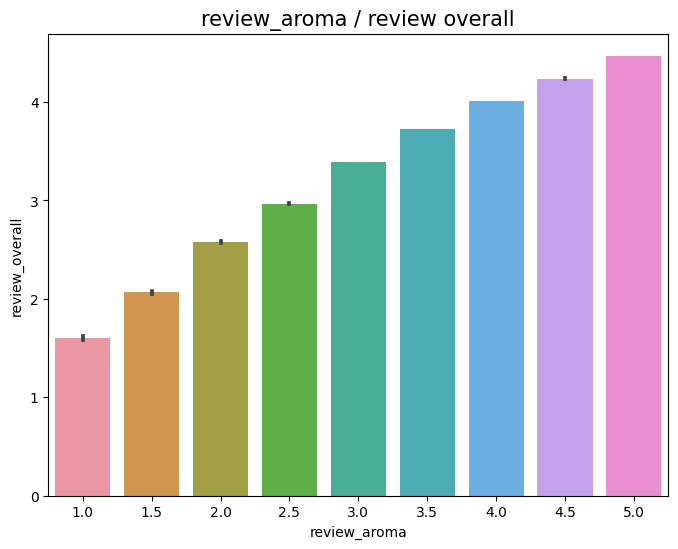

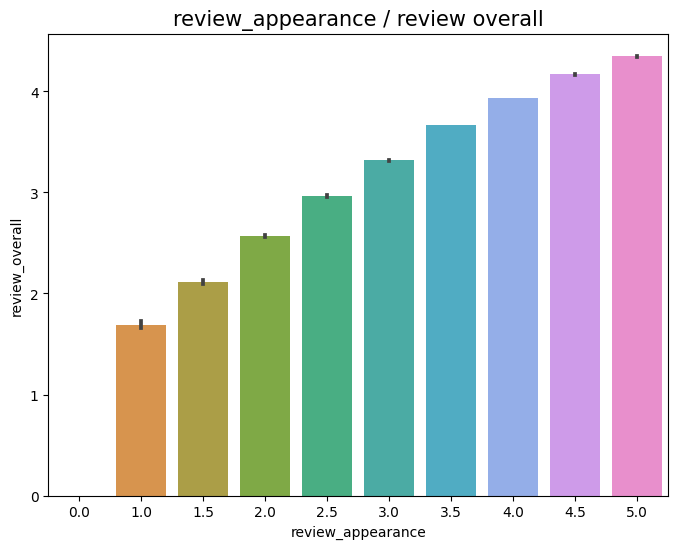

<Figure size 800x600 with 0 Axes>

In [14]:
sns.set_palette('husl')
for i in ["review_aroma", "review_appearance", "review_palate", "review_taste"]:
    plt.figure(figsize=(8,6))
    sns.barplot(x= i, y="review_overall", data=df)
    plt.title("{} / review overall".format(i), fontsize=15)
plt.show()

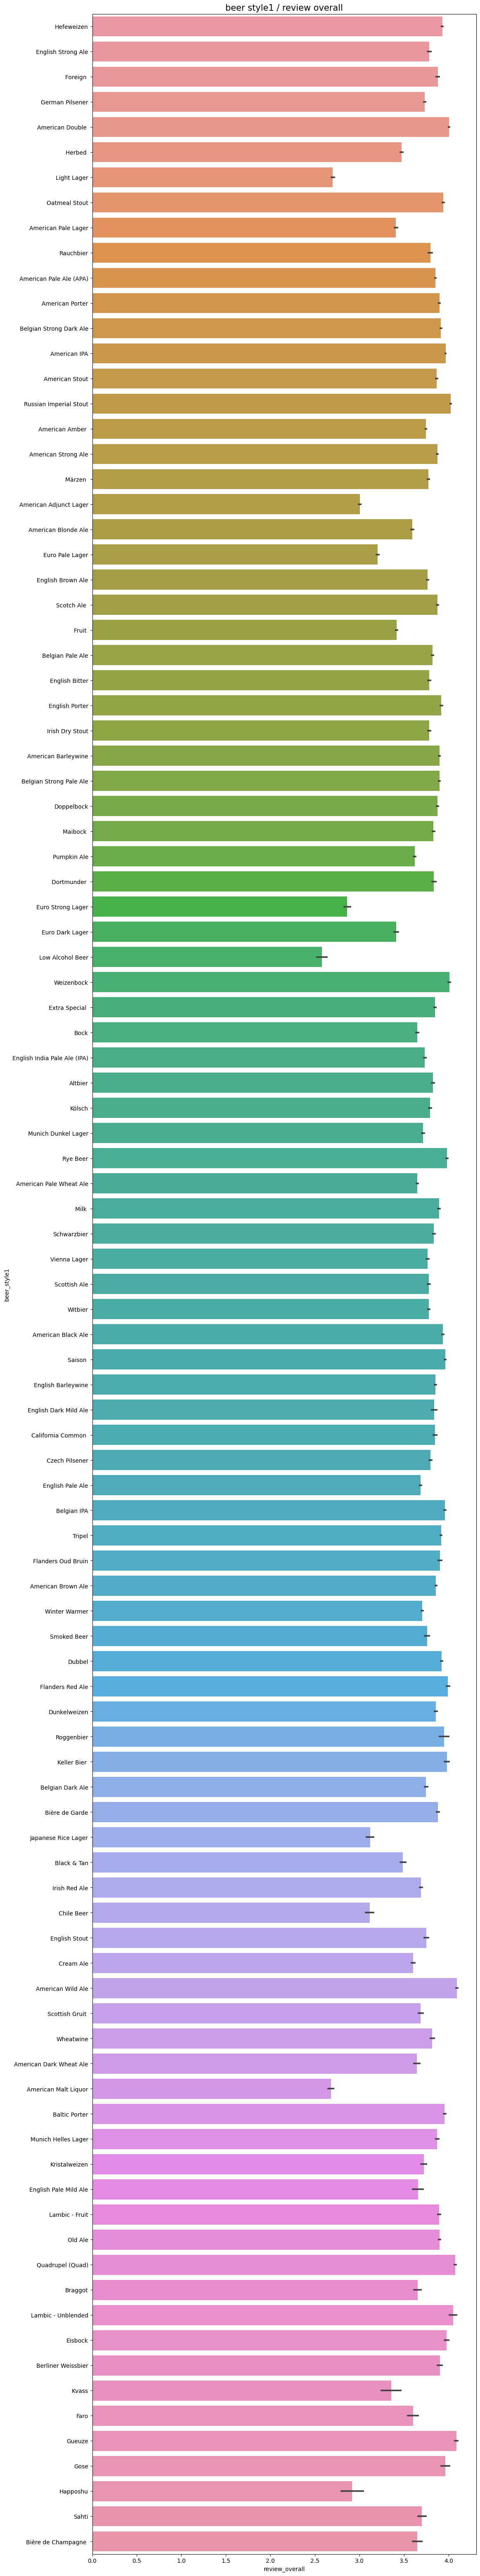

In [ ]:
plt.figure(figsize=(12,80))
sns.barplot(x="review_overall", y="beer_style1", data=df)
plt.title("beer style1 / review overall", fontsize=15)
plt.show()

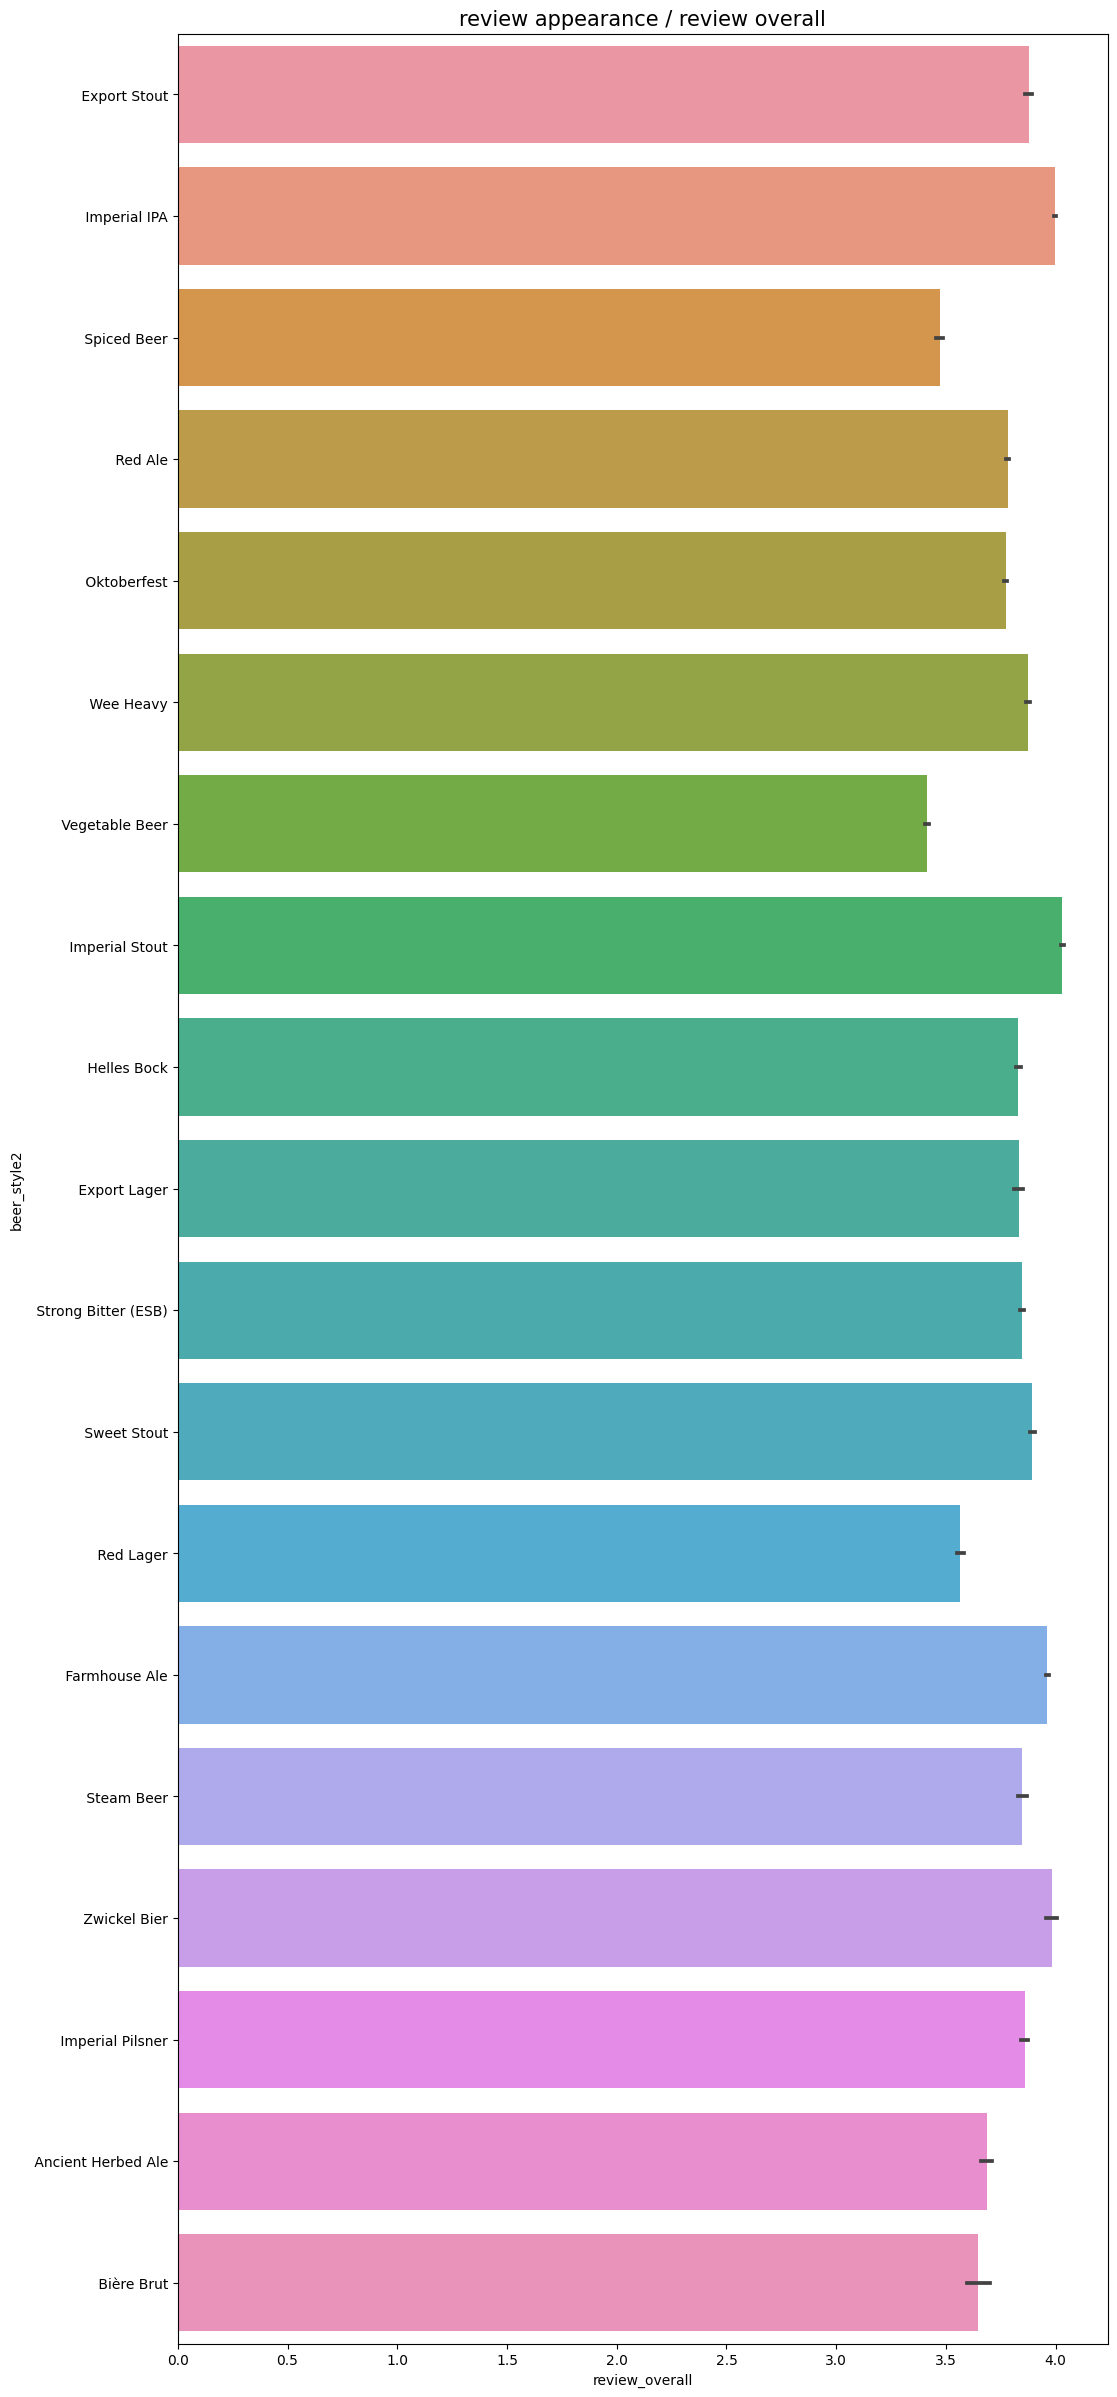

In [ ]:
plt.figure(figsize=(12,30))
sns.barplot(x="review_overall", y="beer_style2", data=df)
plt.title("review appearance / review overall", fontsize=15)
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=["beer_style1", "beer_style2"], drop_first=True)